<a href="https://colab.research.google.com/github/JorgeSandon/Data_Science_Projects/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Heart Disease Dataset**

Este conjunto de datos data de 1988 y consta de cuatro bases de datos: Cleveland, Hungría, Suiza y Long Beach V. Contiene 76 atributos, incluido el atributo de predicción, pero todos los experimentos publicados hacen referencia al uso de un subconjunto de 14 de ellos. El campo "objetivo" se refiere a la presencia de cardiopatía en el paciente. Tiene valor entero 0 = sin enfermedad y 1 = enfermedad.

### **Contenido**
1.	age: edad en años
2.	sex: (1 = hombre; 0 = mujer)
3.	cp: tipo de dolor torácico (4 valores)
4.	trestbps: presión arterial en reposo (en mm Hg al ingreso en el hospital)
5.	chol: colesterol sérico en mg/dl
6.	fbs: glucemia en ayunas > 120 mg/dl (1 = verdadero, 0 = falso)
7.	restecg: resultados electrocardiográficos en reposo (valores 0,1,2)
8.	thalach: frecuencia cardiaca máxima alcanzada
9.	exang: angina inducida por el ejercicio (1 = sí, 0 = no)
10.	oldpeak: depresión del ST inducida por el ejercicio en relación con el reposo
11.	slope: la pendiente del segmento ST pico del ejercicio (0,1,2)
12.	ca: número de vasos principales (0-3) coloreados por fluroscopia
13.	thal: 1 = normal, 2 = defecto fijo, 3 = defecto reversible
14.	target: 0 = sin enfermedad, 1 = enfermedad


Los nombres y números de la seguridad social de los pacientes se eliminaron recientemente de la base de datos y se sustituyeron por valores ficticios.













In [ ]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
#Lectura del dataset
df = pd.read_csv("/content/drive/MyDrive/Kaggle/heart.csv")
print("El dataset contiene", df.shape[0], "filas y", df.shape[1], "columnas")

El dataset contiene 1025 filas y 14 columnas


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


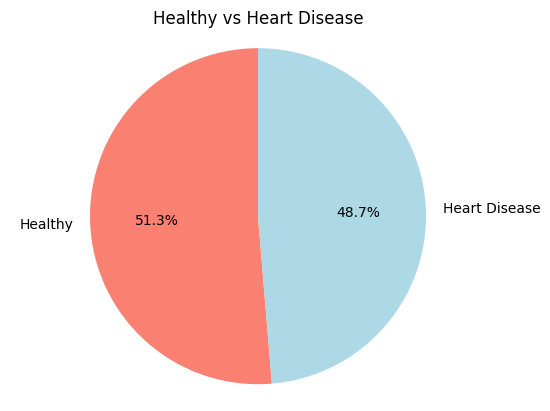

In [ ]:
# Crea la gráfica de torta para ver si el dataset se encuentra balanceado.

labels = ['Healthy', 'Heart Disease']
values = df['target'].value_counts().values.tolist()
plt.pie(values, labels=labels, colors=['salmon', 'lightblue'], startangle=90, autopct='%1.1f%%')
plt.title('Healthy vs Heart Disease')
plt.axis('equal')

plt.show()

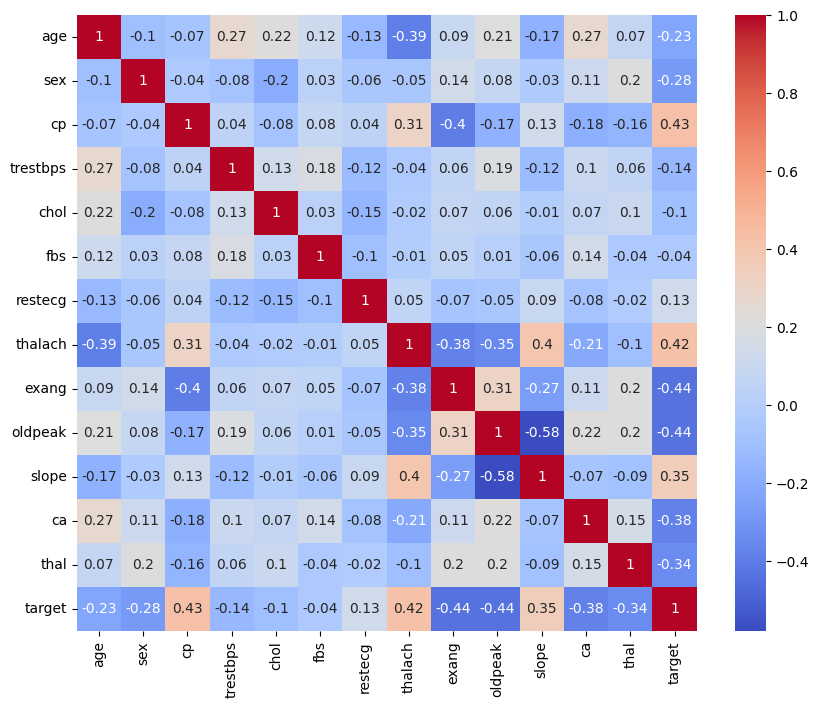

In [ ]:
# Crear el gráfico de correlación
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(round(corr,2), annot=True, cmap='coolwarm', ax=ax)
plt.show()


### **Frecuencia de enfermedades cardiacas en función del sexo**

In [ ]:
# Crea una nueva columna con los valores "Mujer", "Hombre", "Sano" y "Enfermo"

df['sex_name'] = df['sex'].replace({0: 'Mujer', 1: 'Hombre'})
df['target_name'] = df['target'].replace({0: 'Sano', 1: 'Enfermo'})
# Crea la tabla
tabla = pd.crosstab(df.target_name, df.sex_name)

# Elimina las columnas adicionales del DataFrame
df.drop(columns=['sex_name'], inplace=True)
df.drop(columns=['target_name'], inplace=True)

print(tabla)

sex_name     Hombre  Mujer
target_name               
Enfermo         300    226
Sano            413     86


(array([0, 1]), [Text(0, 0, 'Enfermo'), Text(1, 0, 'Sano')])

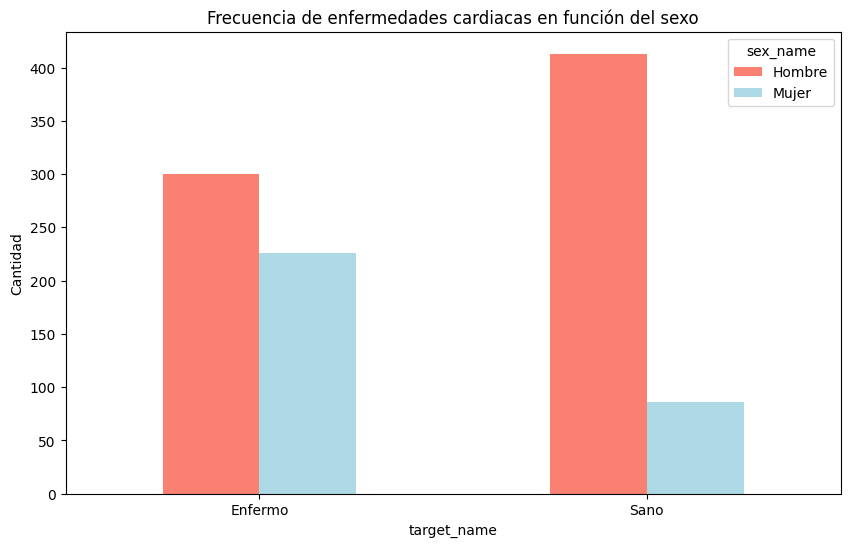

In [ ]:
tabla.plot(kind="bar",
           figsize = (10,6),
           color=["salmon","lightblue"] )

plt.title("Frecuencia de enfermedades cardiacas en función del sexo")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)

### **Frecuencia de enfermedades cardiacas en función de la edad**

Segun el Ministerio de Salud y proteccion social de Colombia, el ciclo vital puede dividirse en diferentes etapas del desarrollo, aunque no deben tomarse en forma absoluta y recordar que existe diversidad individual y cultural. La siguiente clasificación es un ejemplo:

* Primera Infancia (0-5 años)
* Infancia (6 - 11 años)
* Adolescencia (12 - 18 años)
* Juventud (14 - 26 años)
* Adultez (27- 59 años)
* Persona Mayor (60 años o mas) envejecimiento y vejez.
​

Para este caso, en lo observado en el df.describe la edad minima en nuestro dataframe es de 29 por lo que la frecuencia de enfermedades cardiacas en función de la edad se observara en adultos y personas mayores.

In [ ]:
# Define los límites de edad para cada categoría
bins = [29, 60, float('inf')]

# Define los nombres de las categorías
labels = ['Adultez', 'Persona Mayor']

# Crea una nueva columna con las categorías de edad
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Crea una nueva columna con los valores "Sano" y "Enfermo"
df['target_name'] = df['target'].replace({0: 'Sano', 1: 'Enfermo'})

# Crea una tabla de frecuencia
tablax = pd.crosstab(df['target_name'], df['age_category'])
print(tablax)

age_category  Adultez  Persona Mayor
target_name                         
Enfermo           415            111
Sano              338            161


In [ ]:
# Calcula el porcentaje de enfermos en cada categoría de edad

total_adultos = tablax.loc['Enfermo', 'Adultez'] + tablax.loc['Sano', 'Adultez']
total_personamayor = tablax.loc['Enfermo', 'Persona Mayor'] + tablax.loc['Sano', 'Persona Mayor']

porcentaje_enfermosadultos = tablax.loc['Enfermo', 'Adultez'] / total_adultos * 100
porcentaje_enfermosmayor = tablax.loc['Enfermo', 'Persona Mayor'] / total_personamayor * 100

print('% de enfermos en Adultez:', porcentaje_enfermosadultos)
print('% de enfermos en Personas Mayor:', porcentaje_enfermosmayor)

# Elimina las columnas adicionales del DataFrame
df.drop(columns=['age_category'], inplace=True)
df.drop(columns=['target_name'], inplace=True)


% de enfermos en Adultez: 55.112881806108895
% de enfermos en Personas Mayor: 40.80882352941176


In [ ]:
# Tratamiento de datos Outliers
stats = df.describe()

# Calcular el rango intercuartílico (IQR) para cada variable
q1 = stats.loc['25%']
q3 = stats.loc['75%']
iqr = q3 - q1

# Calcular los límites inferior y superior para cada variable
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Identificar los outliers de cada variable
outliers = (df < lower_limit) | (df > upper_limit)

# Reemplazar los outliers con la media de cada variable
for col in df.columns:
    df[col] = np.where(outliers[col], stats.loc['mean', col], df[col])

In [ ]:
#Dividir el conjunto de datos en X,y

X = df.drop('target', axis=1)
y = df['target']

from sklearn.preprocessing import StandardScaler

# Escalar los datos de X
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### **Entrenamiento de modelos**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Crear el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcular la exactitud y la matriz de confusión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Evaluar el rendimiento del modelo
print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{confusion}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8780487804878049
Confusion matrix:
[[ 80   9]
 [ 16 100]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        89
         1.0       0.92      0.86      0.89       116

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#K Vecinos más Cercanos
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular la exactitud y la matriz de confusión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Evaluar el rendimiento del modelo
print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{confusion}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8634146341463415
Confusion matrix:
[[ 76  13]
 [ 15 101]]
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84        89
         1.0       0.89      0.87      0.88       116

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Árbol de decisión
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Calcular la exactitud y la matriz de confusión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Evaluar el rendimiento del modelo
print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{confusion}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion matrix:
[[ 89   0]
 [  0 116]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        89
         1.0       1.00      1.00      1.00       116

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



El modelo tiene un accuracy perfecto en el conjunto de prueba, lo cual puede ser indicativo de overfitting. Es necesario evaluar el rendimiento del modelo en el conjunto de entrenamiento y realizar técnicas de validación cruzada para tener una idea más precisa del rendimiento del modelo en datos no vistos.


In [ ]:
from sklearn.model_selection import cross_val_score

#Aplicar CrossValidation
scores = cross_val_score(dtc, X_train, y_train, cv=10)
print("la precisión promedio es" , scores.mean(),"y la desviación estándar de la validación cruzada", scores.std())

la precisión promedio es 0.9829268292682926 y la desviación estándar de la validación cruzada 0.01561737618886062


La precisión promedio obtenida a través de la validación cruzada es de 0.982 y la desviación estándar es de 0.0156, lo que sugiere que el modelo tiene un buen desempeño en el conjunto de datos. Es importante tener en cuenta que la validación cruzada nos ayuda a obtener una estimación más precisa del rendimiento del modelo en datos no vistos y reduce el riesgo de sobreajuste.